In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
rowData = pd.read_csv('data/all_data.csv')

In [3]:
zipList = rowData['zipcode'].unique()

In [4]:
zip_Count = pd.DataFrame(index = zipList)
zip_Count['max_type'] = 0

In [5]:
ny_house_rent_data = pd.read_csv('new_data/ny_house_rent.csv')
ny_house_rent_data['avg_house_rent_price'] = ny_house_rent_data.drop('zipcode', axis='columns').mean(axis=1)
ny_house_rent_data = ny_house_rent_data[['zipcode','avg_house_rent_price']]
ny_house_rent_data.set_index('zipcode')
ny_house_rent_data.head(3)
ny_house_rent_data.loc[ny_house_rent_data['zipcode']==10025]

,zipcode,avg_house_rent_price
0,10025,3403.057143


In [6]:
musData = pd.read_csv('data\\NYC_Mus_zip_count.csv')
musData.head(2)

,Address ZIP,count1,count5,count15
0,10001,3,23,138
1,10002,2,11,97


In [7]:
raw_restaurant_data = pd.read_csv('new_data/restaurant_data.csv')
restaurant_zip_sum_data = raw_restaurant_data.groupby(['zipcode']).sum().rename(index=int, columns={'count':'res_total_count'}).reset_index()
restaurant_zip_max_data = raw_restaurant_data.groupby(['zipcode']).max().rename(index=int, columns={'count':'res_max_type_count', 'type':'res_max_type'}).reset_index()
restaurant_data = restaurant_zip_max_data.join(restaurant_zip_sum_data.set_index('zipcode'), on='zipcode')
restaurant_data.head(2)

,zipcode,res_max_type,res_max_type_count,res_total_count
0,10001,Vegetarian,1253,3592
1,10002,Vietnamese/Cambodian/Malaysia,923,3560


In [8]:
popuData = pd.read_csv('data\\popu_zip.csv')
popuData.head(2)

,Unnamed: 0,population,zipcode,geo_id
0,376,1403,12917,8600000US12917
1,1043,250,14874,8600000US14874


In [9]:
ny_house_sell_data = pd.read_csv('new_data/ny_house_sell.csv')
ny_house_sell_data['avg_house_sell_price'] = ny_house_sell_data.drop('zipcode', axis='columns').mean(axis=1)
ny_house_sell_data = ny_house_sell_data[['zipcode', 'avg_house_sell_price']]
ny_house_sell_data.head(2)

,zipcode,avg_house_sell_price
0,10025,907383.529412
1,11226,453584.705882


In [10]:
univData = pd.read_csv('data\\NYC_Univ_zip_count.csv')
univData.head(2)

,Address ZIP,count1,count5,count15
0,10001,1,11,86
1,10002,0,0,66


In [11]:
for idx in zipList:
    tempData = rowData.loc[rowData['zipcode']==idx]
    LEVEL_FELONY_count = (tempData['LEVEL_FELONY'] == 1).sum()
    LEVEL_MISDEMEANOR_count = (tempData['LEVEL_MISDEMEANOR'] == 1).sum()
    LEVEL_VIOLATION_count = (tempData['LEVEL_VIOLATION'] == 1).sum()
    total_count = LEVEL_FELONY_count+LEVEL_MISDEMEANOR_count+LEVEL_VIOLATION_count
    max_count = max(LEVEL_FELONY_count, LEVEL_MISDEMEANOR_count, LEVEL_VIOLATION_count)
    #print(total_count)
    #print(max_count)
    if LEVEL_FELONY_count == max_count:
        #zip_Count[idx]['max_type'] = 1
        zip_Count.set_value(idx, 'max_type', 1)
    elif LEVEL_MISDEMEANOR_count == max_count:
        #zip_Count[idx]['max_type'] = 2
        zip_Count.set_value(idx, 'max_type', 2)
    else:
        #zip_Count[idx]['max_type'] = 3
        zip_Count.set_value(idx, 'max_type', 3)    
    #zip_Count[idx]['max_type_rate'] = max_count/total_count
    zip_Count.set_value(idx, 'VIOLATION_rate', LEVEL_VIOLATION_count/total_count)
    #features:
    if idx in ny_house_rent_data.zipcode.values:
        zip_Count.set_value(idx, 'avg_house_rent_price', ny_house_rent_data.loc[ny_house_rent_data['zipcode']==idx].avg_house_rent_price.values[0])
    else:
        zip_Count.set_value(idx, 'avg_house_rent_price', 0)
    #
    if idx in musData['Address ZIP'].values:
        zip_Count.set_value(idx, 'mus_count15', musData.loc[musData['Address ZIP']==idx].count15.values[0])
        zip_Count.set_value(idx, 'mus_count5',  musData.loc[musData['Address ZIP']==idx].count15.values[0])
    else:
        zip_Count.set_value(idx, 'mus_count15', 0)
        zip_Count.set_value(idx, 'mus_count5', 0)
    #
    if idx in restaurant_data.zipcode.values:
        zip_Count.set_value(idx, 'res_max_type', restaurant_data.loc[restaurant_data['zipcode']==idx].res_max_type.values[0])
    else:
        zip_Count.set_value(idx, 'res_max_type', 'NaN')
    #
    if idx in popuData.zipcode.values:
        zip_Count.set_value(idx, 'population', popuData.loc[popuData['zipcode']==idx].population.values[0])
    else:
        zip_Count.set_value(idx, 'population', 0)
    #
    if idx in ny_house_sell_data.zipcode.values:
        zip_Count.set_value(idx, 'avg_house_sell_price', ny_house_sell_data.loc[ny_house_sell_data['zipcode']==idx].avg_house_sell_price.values[0])
    else:
        zip_Count.set_value(idx, 'avg_house_sell_price', 0)
    #
    if idx in univData['Address ZIP'].values:
        zip_Count.set_value(idx, 'univ_count5', univData.loc[univData['Address ZIP']==idx].count5.values[0])
    else:
        zip_Count.set_value(idx, 'univ_count5', 0)
zip_Count

,max_type,VIOLATION_rate,avg_house_rent_price,mus_count15,mus_count5,res_max_type,population,avg_house_sell_price,univ_count5
10026,2,0.139222,3032.985714,141.0,141.0,Vegetarian,34003.0,7.635953e+05,17.0
11231,2,0.089438,2687.500000,36.0,36.0,Vietnamese/Cambodian/Malaysia,33336.0,8.680918e+05,1.0
10302,2,0.192027,1971.742857,72.0,72.0,Spanish,19088.0,3.315129e+05,3.0
11212,2,0.170582,1875.028571,15.0,15.0,Spanish,84500.0,3.087435e+05,0.0
11372,2,0.139169,2010.971429,26.0,26.0,Thai,66636.0,0.000000e+00,2.0
10473,2,0.158479,1710.000000,0.0,0.0,Spanish,58519.0,3.135282e+05,0.0
11102,2,0.182540,2175.114286,61.0,61.0,Spanish,34133.0,0.000000e+00,0.0
11451,2,0.164694,0.000000,15.0,15.0,American,0.0,0.000000e+00,6.0
11419,2,0.177333,1922.028571,12.0,12.0,Vegetarian,47211.0,3.861224e+05,0.0
10018,2,0.094111,0.000000,94.0,94.0,Vietnamese/Cambodian/Malaysia,5229.0,0.000000e+00,7.0


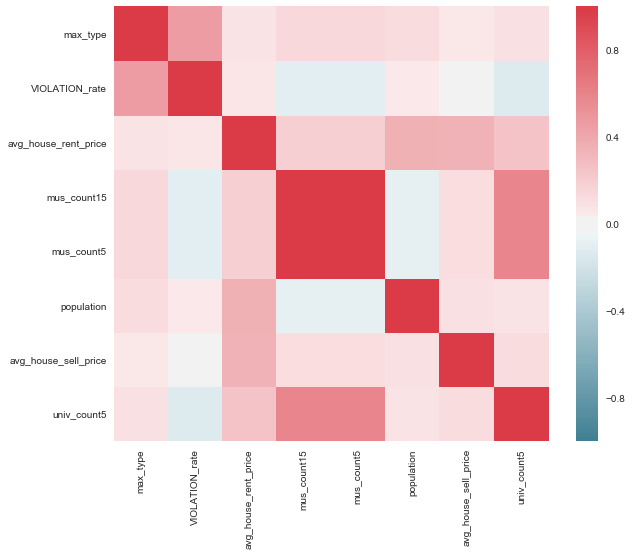

In [12]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = zip_Count.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [13]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import roc_curve, auc
import sklearn.preprocessing
from scipy import interp
import math

In [14]:
mean_rate = zip_Count['VIOLATION_rate'].mean()
print(mean_rate)
zip_Count['Y'] = 0
for index, row in zip_Count.iterrows():
    if row['VIOLATION_rate']>=mean_rate:
        zip_Count.set_value(index, 'Y', 1)
zip_Count

0.14570990202610187


,max_type,VIOLATION_rate,avg_house_rent_price,mus_count15,mus_count5,res_max_type,population,avg_house_sell_price,univ_count5,Y
10026,2,0.139222,3032.985714,141.0,141.0,Vegetarian,34003.0,7.635953e+05,17.0,0
11231,2,0.089438,2687.500000,36.0,36.0,Vietnamese/Cambodian/Malaysia,33336.0,8.680918e+05,1.0,0
10302,2,0.192027,1971.742857,72.0,72.0,Spanish,19088.0,3.315129e+05,3.0,1
11212,2,0.170582,1875.028571,15.0,15.0,Spanish,84500.0,3.087435e+05,0.0,1
11372,2,0.139169,2010.971429,26.0,26.0,Thai,66636.0,0.000000e+00,2.0,0
10473,2,0.158479,1710.000000,0.0,0.0,Spanish,58519.0,3.135282e+05,0.0,1
11102,2,0.182540,2175.114286,61.0,61.0,Spanish,34133.0,0.000000e+00,0.0,1
11451,2,0.164694,0.000000,15.0,15.0,American,0.0,0.000000e+00,6.0,1
11419,2,0.177333,1922.028571,12.0,12.0,Vegetarian,47211.0,3.861224e+05,0.0,1
10018,2,0.094111,0.000000,94.0,94.0,Vietnamese/Cambodian/Malaysia,5229.0,0.000000e+00,7.0,0


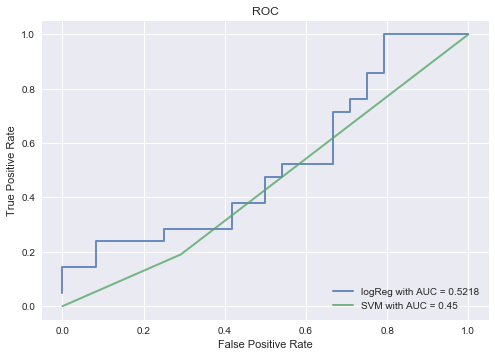

In [15]:
# convert encoding
le = sklearn.preprocessing.LabelEncoder()
zip_Count['res_max_type'] = le.fit_transform(zip_Count['res_max_type'])

totalRows = len(zip_Count.index)
train_df_idx = np.random.choice(zip_Count.index, math.ceil(totalRows*0.8), replace=False)
data_train = zip_Count.loc[train_df_idx]
data_test = zip_Count.loc[~zip_Count.index.isin(train_df_idx)]

y_labels = ['Y','VIOLATION_rate']
y_label = 'Y'
logReg_cla = LogisticRegression(C=1e5)
prob_l = logReg_cla.fit(data_train.drop(y_labels, axis=1), data_train[y_label]).predict_proba(data_test.drop(y_labels, axis=1))
pred = prob_l[:,1]

fact = np.array(data_test[y_label].tolist())
fpr, tpr, thresholds = roc_curve(data_test[y_label], pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, alpha=0.8,label='%s with AUC = %0.4f' % ('logReg', roc_auc))


###
#SVM
svm_cla_prob = svm.SVC(kernel='linear')
probas_ = svm_cla_prob.fit(data_train.drop(y_labels, axis=1), data_train[y_label]).predict(data_test.drop(y_labels, axis=1))
#pred = probas_[:, 1]
pred = probas_
fpr, tpr, thresholds = roc_curve(data_test[y_label], pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, alpha=0.8,label='%s with AUC = %0.2f' % ('SVM', roc_auc))


plt.title('ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [16]:
zip_Count.to_csv('data\\crime_baseonZIP.csv')